# General Burgers: $u_{t} + (u)u_{x} - \alpha u_{xx} = 0$
#### where $\alpha =$ diffusion coefficient, and $\alpha = 0$ for Inviscid Burgers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output

Interactive 3D potter (ensure %matplotlib widget in library calls)

In [2]:
def PDE_plotter_3D(x_grid, t_grid, U):
    %matplotlib widget
    x,t = np.meshgrid(x_grid, t_grid)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, t, U, cmap='viridis')
    ax.set_xlabel('Space (r)')
    ax.set_ylabel('Time (t)')
    ax.set_zlabel('u(r,t)')
    plt.show()

## I. Inviscid Burgers, using Godunov's Scheme (From Libraries): $u_{t} + (u)u_{x} = 0$

In [3]:
# Load code libraries
from godunov_burgers import PDE_plotter_1D as Pplot
from godunov_burgers import second_order_godunov_burgers as gb

1. Define Boundary Conditions

In [4]:
# Boundary Condition Functions (Direchelet - time domain)

def u_t_0(t):
    '''
    Assigns the initial value for the 0-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float]    
    '''
    return t

def u_t_L(t):
    '''
    Assigns the initial value for the L-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return t

# Initial Condition Functions

def u_0_x(x):
    '''
    Assigns the initial values for u (non-boundary points).
    If the initial value is a constant, leave function as-is.
    If the initial value is a function of x, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return np.sin(np.pi*x)

In [5]:
# Determing the FLRW acceleration term
def a(t):
    '''
    Using the standard a(t) = t/t0^(2/3) for matter dominated universe.
    
    Return 1 to simulate non-expanding universe.
    '''
    
    return 1

2. Create the grid

In [6]:
# Create Grid and initiatlize - these will represent Cells rather than nodes
L = 1
t_max = 1

dx = .01
dt = .0001

3. Run the Function

k = 0
#second_order_godunov_burgers(u_0_x, u_t_0, u_t_L, a_t, dx, dt, t_max, L, k)
u = gb(u_0_x, u_t_0, u_t_L, a, dx, dt, t_max, L, k)

4. Plot the function

# Plotting t = 0 to t = 1000, in 20dt increments
for i in np.arange(0,len(u),500):
    plt.plot(u[i])
    plt.xlabel('x')
    plt.ylabel('T')
plt.show()

steps = 20
t_min_plot = 0             # default = 0
t_max_plot = t_max      # default = len(U)
x_min_plot = 0           # default = 0
x_max_plot = L         # default = L

Pplot(u, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot)

## II. Inviscid Burgers using Explicit Method 
### (Original Method, shows shockwave oscillations)

1. Create grid and initialize.

In [12]:
# Create Grid
L = 1
t_max = .25

dx = .01
dt = .0001

Nx = int(L/dx) + 1
Nt = int(t_max/dt) + 1

x_grid = np.linspace(0,L,Nx)
t_grid = np.linspace(0,t_max,Nt)

# Initialize Array with initial conditions
U = []

u_t_x_0 = []

for x in x_grid:
    u_t_x_0.append(u_0_x(x))
U.append(u_t_x_0)

2. Run the explicit algorithm.

In [13]:
for i in range(Nt):
    u_t_x = []
    
    u_line = U[-1]
    
    for j in range(1,Nx-1):
        # Using a time-forward centered difference formula (TFCD) 
        u = u_line[j] - ((dt/(2*dx)) * u_line[j] * (u_line[j+1] - u_line[j-1]))
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,0)
    u_t_x.insert(len(u_line),0)

    # Now append the full solutions matrix
    U.append(u_t_x) 
    
# #Convert to np array
# U = np.array(U)

**Adding in diffusion**

Note for future modifications: Write a_diff as a function, such as:
def diff(x,t):
    x = 
    t = 
    diff_x_t = 'function of x, t; could also be a constant'
    return diff_x_t

In [14]:
# With diffusion

a_diff = .1 #diffusion coefficient, 0 for inviscid

for i in range(Nt):
    u_t_x = []
    
    u_line = U[-1]
    
    for j in range(1,Nx-1):
        # diffusion term
        diff = (a_diff * dt/dx**2)*(u_line[j+1] + u_line[j-1] - 2 * u_line[j])
        # Using a time-forward centered difference formula (TFCD) 
        u = u_line[j] - ((dt/(2*dx)) * u_line[j] * (u_line[j+1] - u_line[j-1])) + diff
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,0)
    u_t_x.insert(len(u_line),0)

    # Now append the full solutions matrix
    U.append(u_t_x) 
    
#Convert to np array
U = np.array(U)

In [15]:
pd.DataFrame(U)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.248690,0.278991,...,0.278991,0.248690,0.218143,0.187381,0.156434,0.125333,0.094108,0.062791,0.031411,1.224647e-16
1,0.0,0.031401,0.062771,0.094079,0.125294,0.156386,0.187323,0.218076,0.248614,0.278907,...,0.279075,0.248766,0.218210,0.187439,0.156483,0.125372,0.094138,0.062810,0.031421,0.000000e+00
2,0.0,0.031391,0.062751,0.094049,0.125255,0.156337,0.187266,0.218010,0.248539,0.278823,...,0.279159,0.248841,0.218277,0.187497,0.156532,0.125411,0.094167,0.062830,0.031430,0.000000e+00
3,0.0,0.031381,0.062732,0.094020,0.125216,0.156289,0.187208,0.217943,0.248463,0.278739,...,0.279244,0.248917,0.218344,0.187555,0.156580,0.125450,0.094197,0.062850,0.031440,0.000000e+00
4,0.0,0.031371,0.062712,0.093991,0.125177,0.156241,0.187150,0.217876,0.248388,0.278655,...,0.279328,0.248993,0.218411,0.187613,0.156629,0.125490,0.094226,0.062869,0.031450,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,0.0,0.011929,0.023857,0.035783,0.047706,0.059625,0.071539,0.083448,0.095349,0.107242,...,0.403603,0.365454,0.325125,0.282781,0.238622,0.192888,0.145848,0.097803,0.049074,0.000000e+00
4999,0.0,0.011927,0.023854,0.035778,0.047700,0.059618,0.071530,0.083437,0.095337,0.107229,...,0.403522,0.365379,0.325058,0.282722,0.238572,0.192847,0.145817,0.097782,0.049064,0.000000e+00
5000,0.0,0.011926,0.023851,0.035774,0.047694,0.059610,0.071521,0.083426,0.095325,0.107215,...,0.403440,0.365305,0.324991,0.282663,0.238521,0.192806,0.145786,0.097761,0.049053,0.000000e+00
5001,0.0,0.011924,0.023848,0.035769,0.047688,0.059602,0.071512,0.083416,0.095313,0.107201,...,0.403359,0.365230,0.324924,0.282603,0.238471,0.192765,0.145754,0.097740,0.049043,0.000000e+00


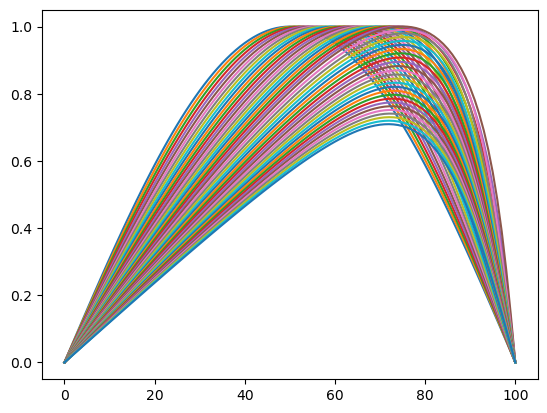

In [19]:
for i in np.arange(0,len(U),100):
    plt.plot(U[i])

3. Basic Plot

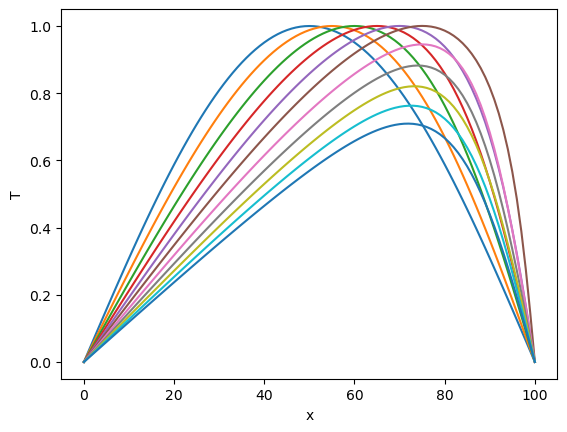

In [20]:
# Plotting t = 0 to t = 1000, in 20dt increments
for i in np.arange(0,len(U),500):
    plt.plot(U[i])
    plt.xlabel('x')
    plt.ylabel('T')
plt.show()

In [23]:
U1 = U.copy()

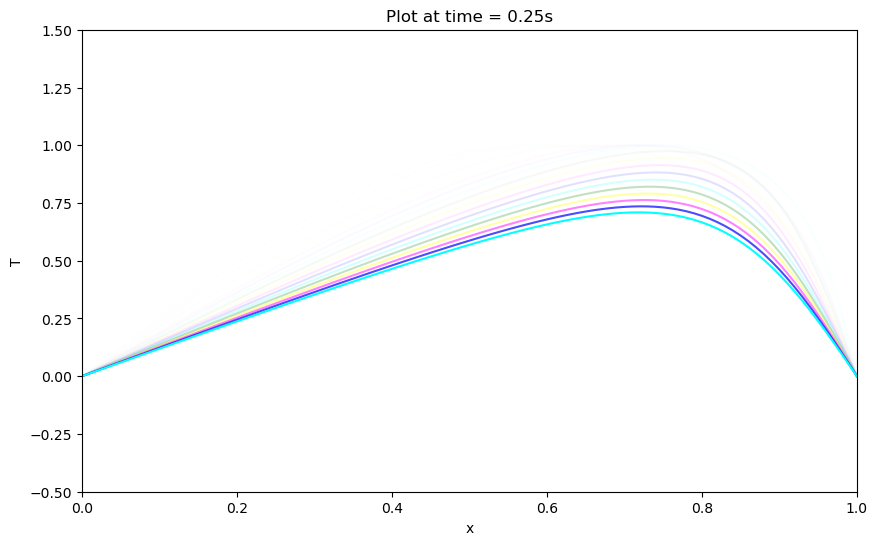

In [24]:
Pplot(U1, L, t_max, 20, 0, t_max, 0, L, style = 'multi', alpha_decay = .7)

4. Advanced Plot

Shocks (and then blowup) develop at x = .5 and around t = .18s.  Zooming in:

In [ ]:
steps = 20
t_min_plot = .15             # default = 0
t_max_plot = .22      # default = len(U)
x_min_plot = .4            # default = 0
x_max_plot = .6          # default = L

Pplot(U, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot)

5. 3D plot

In [ ]:
PDE_plotter_3D(x_grid, t_grid, U[:-1])

## III. Gudonov Scheme Approach (Used to build functions in Part 1)
This is a finite volume scheme preferred for the Inviscid Burgers.  Note that Implicit Schemes not recommended for hyperbolic functions.

In [ ]:
# Create Grid and initiatlize - these will represent Cells rather than nodes
L = 1
t_max = 3

dx = .01
dt = .0001

In [ ]:
# Determing the FLRW acceleration term
def a(t):
    '''
    Using the standard a(t) = t/t0^(2/3) for matter dominated universe
    '''
    return 1 + t**(2/3)

In [ ]:
def godunov_flux(ul, ur, a):
    """Godunov's flux for the inviscid Burgers' equation with scale factor"""
    if ul > ur:
        if ul > 0 and ur > 0:
            return 0.5 * ul**2 / a
        elif ul < 0 and ur < 0:
            return 0.5 * ur**2 / a
        else:
            return 0
    else:
        if ul + ur > 0:
            return 0.5 * ul**2 / a
        else:
            return 0.5 * ur**2 / a

In [ ]:
def minmod(a, b):
    '''
    Minmod function for slope limiting - improves Gudanov's w/ MUSCL - Monotonic Upstream Centered Schemes for Conservation Laws
    '''
    if a * b <= 0:
        return 0
    else:
        return min(abs(a), abs(b)) * np.sign(a)

In [ ]:
def second_order_godunov_burgers(u_0_x, u_t_0, u_t_L, dx, dt, t_max, L, k):
    '''
    
    '''
    Nx = int(L/dx) + 1
    Nt = int(t_max/dt) + 1

    x_grid = np.linspace(0,L,Nx)
    t_grid = np.linspace(0,t_max,Nt)
    
    u_0 = u_0_x(x_grid)
    
    nt = int(t_max / dt)
    nx = len(u_0)
    u = np.zeros((nt + 1, nx))
    u[0, :] = u_0

    for n in range(nt):
        t = n * dt
        at = a(t)
        u_n = u[n, :]
        uL = np.zeros(nx - 1)
        uR = np.zeros(nx - 1)
        flux = np.zeros(nx)

        for i in range(1, nx - 1):
            duL = minmod(u_n[i] - u_n[i - 1], u_n[i + 1] - u_n[i])
            duR = minmod(u_n[i + 1] - u_n[i], u_n[i + 2] - u_n[i + 1] if i + 2 < nx else 0)

            uL[i] = u_n[i] + 0.5 * duL
            uR[i] = u_n[i + 1] - 0.5 * duR

        for i in range(1, nx - 1):
            flux[i] = godunov_flux(uL[i], uR[i], at)

        for i in range(1, nx - 1):
            u[n + 1, i] = u_n[i] - dt / dx * (flux[i] - flux[i - 1]) - dt * k * u_n[i] / at**2
        
        # Boundary conditions
        u[n + 1, 0] = u_t_0(0)
        u[n + 1, -1] = u_t_L(0)

    return u

In [ ]:
k = 1
u = gb(u_0_x, u_t_0, u_t_L, a, dx, dt, t_max, L, k)

steps = 20
t_min_plot = 0             # default = 0
t_max_plot = t_max      # default = len(U)
x_min_plot = 0           # default = 0
x_max_plot = L         # default = L

Pplot(u, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot)

In [ ]:
PDE_plotter_3D(x_grid, t_grid, u)

# BELOW - THIS IS THE WAY!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

def initial_condition(x):
    """Initial condition for the Burgers' equation"""
    return np.sin(np.pi * x)

def minmod(a, b):
    """Minmod function for slope limiting"""
    if a * b <= 0:
        return 0
    else:
        return min(abs(a), abs(b)) * np.sign(a)

def godunov_flux(ul, ur):
    """Godunov's flux for the inviscid Burgers' equation"""
    if ul > ur:
        if ul > 0 and ur > 0:
            return 0.5 * ul**2
        elif ul < 0 and ur < 0:
            return 0.5 * ur**2
        else:
            return 0
    else:
        if ul + ur > 0:
            return 0.5 * ul**2
        else:
            return 0.5 * ur**2

def implicit_crank_nicolson_diffusion(u, dx, dt, a):
    """Solve the diffusion term using the Crank-Nicolson method"""
    nx = len(u)
    alpha = a * dt / (2 * dx**2)

    # Create the tridiagonal matrix for Crank-Nicolson scheme
    A = np.zeros((3, nx - 2))
    A[0, 1:] = -alpha  # Upper diagonal
    A[1, :] = 1 + 2 * alpha  # Main diagonal
    A[2, :-1] = -alpha  # Lower diagonal

    # Construct the right-hand side
    b = np.zeros(nx - 2)
    b[:] = (1 - 2 * alpha) * u[1:-1] + alpha * (u[:-2] + u[2:])

    # Solve the tridiagonal system
    u_new = solve_banded((1, 1), A, b)

    return np.concatenate(([u[0]], u_new, [u[-1]]))

def second_order_godunov_viscid_burgers_implicit(u0, dx, dt, t_max, a):
    """Solve the viscid Burgers' equation using a second-order Godunov scheme with MUSCL and implicit diffusion"""
    nt = int(t_max / dt)
    nx = len(u0)
    u = np.zeros((nt + 1, nx))
    u[0, :] = u0

    for n in range(nt):
        u_n = u[n, :]
        uL = np.zeros(nx - 1)
        uR = np.zeros(nx - 1)
        flux = np.zeros(nx)

        # Compute fluxes for the advection term using Godunov's method
        for i in range(1, nx - 1):
            duL = minmod(u_n[i] - u_n[i - 1], u_n[i + 1] - u_n[i])
            duR = minmod(u_n[i + 1] - u_n[i], u_n[i + 2] - u_n[i + 1] if i + 2 < nx else 0)

            uL[i] = u_n[i] + 0.5 * duL
            uR[i] = u_n[i + 1] - 0.5 * duR

        for i in range(1, nx - 1):
            flux[i] = godunov_flux(uL[i], uR[i])

        # Advection update (explicit)
        u_advection = u_n.copy()
        for i in range(1, nx - 1):
            u_advection[i] = u_n[i] - dt / dx * (flux[i] - flux[i - 1])
        
        # Diffusion update (implicit)
        u_diffusion = implicit_crank_nicolson_diffusion(u_advection, dx, dt, a)
        
        u[n + 1, :] = u_diffusion
        
        # Boundary conditions
        u[n + 1, 0] = u[n + 1, -1] = 0

    return u

# Parameters
L = 2
nx = 101
dx = L / (nx - 1)
x = np.linspace(0, L, nx)

t_max = 1
dt = 0.01
a = 0  # Diffusion coefficient

# Initial condition
u0 = initial_condition(x)

# Solve the equation
u = second_order_godunov_viscid_burgers_implicit(u0, dx, dt, t_max, a)

# Plot the results
plt.figure(figsize=(8, 4))
for i in range(0, u.shape[0], int(u.shape[0] / 10)):
    plt.plot(x, u[i, :], label=f't={i*dt:.2f}')
plt.xlabel('x')
plt.ylabel('u')
#plt.set_xlim(-5, 5)
plt.legend()
plt.title('Viscid Burgers Equation using Implicit Crank-Nicolson and Second-Order Godunov Scheme')
plt.show()


In [ ]:
u

In [ ]:
plt.plot(u[100])

### Real quick, plotting the two against one another:

In [ ]:
def PDE_plotter_1D_x(U1, U2, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot, style = 'multi', alpha_decay = .7):
    '''
    Function takes in calculated 1D data changing over time
    array of lists, the outer array holding timesteps and the inner holding the u value at each point for that step

    ! - Lots of Organizing Needed Here
    '''
    # Check for Errors
    if t_max_plot > t_max:
        raise Exception('Plotting end time exceeds maximum time')
    if t_min_plot < 0:
        raise Exception('Plotting start time must be greater than 0')
    if t_min_plot >= t_max_plot:
        raise Exception('Max plot time greater than minimum plot time')
    if x_min_plot < 0:
        raise Exception('Minimum x plot less than left boundary')
    if x_max_plot > L:
        raise Exception('Mamimum x plot larger than the right boundary')
    if x_min_plot >= x_max_plot:
        raise Exception('Invalid x value plotting range')
    

    dt = t_max/len(U1)
    t_min_index = int(t_min_plot / dt)
    #*#t_max_index = int(t_max_plot / dt)
    t_max_index = int(t_max_plot / dt) +1
    print('t_min_index:',t_min_index)
    print('t_max_index:',t_max_index)
    
    dx = L/len(U1[0])
    x_min_index = int(x_min_plot / dx)
    x_max_index = int(x_max_plot / dx)
    print('x_min_index:',x_min_index)
    print('x_max_index:',x_max_index)

    # Create slice to analyze
    U1_slice = U1[t_min_index:t_max_index]
    U2_slice = U2[t_min_index:t_max_index]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('x')  # Set x-axis label
    ax.set_ylabel('T')  # Set y-axis label

    # Set the y-axis limits
    y_min = min([min(u) for u in U1_slice]) - 0.5  # Find the minimum y-value in U with some buffer
    y_max = max([max(u) for u in U1_slice]) + 0.5  # Find the maximum y-value in U with some buffer
    ax.set_ylim(y_min, y_max)

    # Set the x-axis limits
    ax.set_xlim(x_min_plot, x_max_plot)
    
    lines = []  # List to store line objects

    plt.show()
    
    interval = len(U1_slice)//steps

    color_counter = 5
   
    for i in np.arange(0, len(U1_slice), interval):
        # Update the alpha values of existing lines
        
        for line in lines:
            line.set_alpha(line.get_alpha() * alpha_decay)
    
        # Compute scaled x-axis values
        x_values = np.linspace(0, L, len(U1_slice[i]))
        x_values_used = x_values[x_min_index:x_max_index+1]
        
        # Add new line
        if style == 'heat':
            line_color = 'red'
        if style == 'multi':
            line_color = ['cyan','green','yellow','magenta','blue'][color_counter%5]
            color_counter += 1

        new_line1, = ax.plot(x_values_used,U1_slice[i][x_min_index:x_max_index+1], color=line_color, alpha=1)
        new_line2, = ax.plot(x_values_used,U2_slice[i][x_min_index:x_max_index+1], color=line_color, alpha=1)# Start with full opacity
        lines.append(new_line1)  # Store the new line object
        lines.append(new_line2)
        #ax.set_title(f"Plot at time = {i/(len(U_slice)-1)}s")  # Update the title with the current step
        ax.set_title(f"Plot at time = {round(t_min_plot + i*dt,3)}s")
        
        
        # Handling plot display
        clear_output(wait=True)  # Clear the previous plot
        display(fig)  # Display the current figure

        time.sleep(0.25)  # Pause for half a second before the next update 

1. Write and Describe general burgers Equation, what it is used for, classifications, etc.
2. Write down the relativistic Burgers equation and what parameters we will vary
3. Load Libraries
4. To go to the bottom 

In [ ]:
import numpy as np

# Define the spatial and temporal parameters
Nx = 50  # Number of spatial points
L = 1.0  # Length of the spatial domain
dx = L / (Nx - 1)  # Spatial step size

Nt = 100  # Number of time steps
T = 1.0  # Total time
dt = T / Nt  # Time step size

# Define the initial condition function
def initial_condition(x):
    return np.sin(np.pi * x)  # Example initial condition

# Define the function f(v_j_minus_1, v_j)
def f(v1, v2):
    return (v1 + v2) / 2  # Example function, replace with the actual one

# Define the function k(r)
def k(r):
    return r  # Example function, replace with the actual one

# Define the function a
def a(v):
    return 1 + v**2  # Example function, replace with the actual one

# Define the function S_j
def S(v, a_t, a_val):
    return -(v * (1 - v**2) * (a_t / a_val))

# Initialize the arrays
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
v = np.zeros((Nt, Nx))
v[0, :] = initial_condition(x)

In [ ]:
# Time-stepping loop
for n in range(Nt - 1):
    v_new = np.copy(v[n, :])
    a_t = a(v[n, :])
a_t

In [ ]:

# Time-stepping loop
for n in range(Nt - 1):
    v_new = np.copy(v[n, :])
    a_t = a(v[n, :])
    
    # Iterative solver for the implicit scheme (using a simple fixed-point iteration or Newton's method)
    tol = 1e-6
    max_iter = 100
    for _ in range(max_iter):
        v_half = (v[n, :] + v_new) / 2
        
        # Compute b, g, and S at time step n+1/2
        b = (1 - k(v_half)) / a(v_half)
        g_j_minus_1_2 = f(v_half[:-1], v_half[1:])
        g_j_plus_1_2 = f(v_half[:-1], v_half[1:])
        S_j_half = S(v_half, a_t, a(v_half))
        
        
        print('v half',len(v[n]),'v new length',len(v_new),'length b',len(b),'sj',len(S_j_half[:]))
        print('g',len(g_j_minus_1_2))
        
        # Update v_new
        v_new[:] = v[n,:] - (dt / dx) * (b[:] * g_j_plus_1_2 - b[:] * g_j_minus_1_2) + dt * S_j_half[:]
        
        # Check for convergence
        if np.linalg.norm(v_new - v_half) < tol:
            break
    
    v[n + 1, :] = v_new

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(0, Nt, Nt // 10):
    plt.plot(x, v[i, :], label=f't={t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Numerical Solution')
plt.legend()
plt.show()

In [ ]:
math.factorial(3)

# ---===[Scrap work!]===---

In [ ]:
math.factorial(0)

In [ ]:
N_d = 1 # N Dependent dimensions - spatial dimensions
N_i = 1 # N Independant dimensions - time - single dimensional

for _ n range(10):
    row = math.factorial(N_d)
    